In [133]:
import pandas as pd
import numpy as np

In [134]:
df = pd.read_csv('data/Crimes_Chi_2001_to_2023.csv')
df.shape

(7822066, 22)

In [135]:
df.head(3).T

#'ID' and 'Case Number': no need b/c unique #s
#'Updated On': no need
#Location: probably no need b/c of duplication of 'Latitude' and 'Longitude'

#'Date': need to split into three columns (date, time, and am/pm)

,0,1,2
ID,10224738,10224739,11646166
Case Number,HY411648,HY411615,JC213529
Date,09/05/2015 01:30:00 PM,09/04/2015 11:30:00 AM,09/01/2018 12:01:00 AM
Block,043XX S WOOD ST,008XX N CENTRAL AVE,082XX S INGLESIDE AVE
IUCR,0486,0870,0810
Primary Type,BATTERY,THEFT,THEFT
Description,DOMESTIC BATTERY SIMPLE,POCKET-PICKING,OVER $500
Location Description,RESIDENCE,CTA BUS,RESIDENCE
Arrest,False,False,False
Domestic,True,False,True


In [136]:
#deletes these columns except 'Location'
df.drop(columns=['ID','Case Number', 'Updated On'], inplace=True)

---
# **Duplicate**

In [137]:
#checks duplicates
df.duplicated().sum()

19502

In [138]:
#delete the duplicated rows and checks the results
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

In [139]:
### comment out b/c of taking a long time to run
# #checks dupulicated columns
# df.T.duplicated().sum()

# #result: 0 / running time: 1587m 35.2s

---
# **Formatting Data**

In [140]:
#'Date': split into three columns (date, time, and am/pm)
df[['date', 'time', 'am_pm']] = df['Date'].str.split(' ', expand=True)
df.head(2)

,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,...,FBI Code,X Coordinate,Y Coordinate,Year,Latitude,Longitude,Location,date,time,am_pm
0,09/05/2015 01:30:00 PM,043XX S WOOD ST,0486,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,False,True,924,9.0,...,08B,1165074.0,1875917.0,2015,41.815117,-87.6700,"(41.815117282, -87.669999562)",09/05/2015,01:30:00,PM
1,09/04/2015 11:30:00 AM,008XX N CENTRAL AVE,0870,THEFT,POCKET-PICKING,CTA BUS,False,False,1511,15.0,...,06,1138875.0,1904869.0,2015,41.895080,-87.7654,"(41.895080471, -87.765400451)",09/04/2015,11:30:00,AM


In [141]:
df.drop(columns=['Date'], inplace=True)

In [142]:
df.info()

#'date' and 'time': need to change to a datetime style
#'IUCR': why 'object'?

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7802564 entries, 0 to 7822065
Data columns (total 21 columns):
 #   Column                Dtype  
---  ------                -----  
 0   Block                 object 
 1   IUCR                  object 
 2   Primary Type          object 
 3   Description           object 
 4   Location Description  object 
 5   Arrest                bool   
 6   Domestic              bool   
 7   Beat                  int64  
 8   District              float64
 9   Ward                  float64
 10  Community Area        float64
 11  FBI Code              object 
 12  X Coordinate          float64
 13  Y Coordinate          float64
 14  Year                  int64  
 15  Latitude              float64
 16  Longitude             float64
 17  Location              object 
 18  date                  object 
 19  time                  object 
 20  am_pm                 object 
dtypes: bool(2), float64(7), int64(2), object(10)
memory usage: 1.2+ GB


In [143]:
#changes the 'date' and 'time' columns to a datatime type
df['date'] = pd.to_datetime(df['date'])
# #df['time'] = pd.to_timedelta(df['time'])
# df['time'] = pd.to_datetime(df['time'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7802564 entries, 0 to 7822065
Data columns (total 21 columns):
 #   Column                Dtype         
---  ------                -----         
 0   Block                 object        
 1   IUCR                  object        
 2   Primary Type          object        
 3   Description           object        
 4   Location Description  object        
 5   Arrest                bool          
 6   Domestic              bool          
 7   Beat                  int64         
 8   District              float64       
 9   Ward                  float64       
 10  Community Area        float64       
 11  FBI Code              object        
 12  X Coordinate          float64       
 13  Y Coordinate          float64       
 14  Year                  int64         
 15  Latitude              float64       
 16  Longitude             float64       
 17  Location              object        
 18  date                  datetime64[ns]
 19  

In [144]:
df.head()

,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,...,FBI Code,X Coordinate,Y Coordinate,Year,Latitude,Longitude,Location,date,time,am_pm
0,043XX S WOOD ST,0486,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,False,True,924,9.0,12.0,...,08B,1165074.0,1875917.0,2015,41.815117,-87.670000,"(41.815117282, -87.669999562)",2015-09-05,01:30:00,PM
1,008XX N CENTRAL AVE,0870,THEFT,POCKET-PICKING,CTA BUS,False,False,1511,15.0,29.0,...,06,1138875.0,1904869.0,2015,41.895080,-87.765400,"(41.895080471, -87.765400451)",2015-09-04,11:30:00,AM
2,082XX S INGLESIDE AVE,0810,THEFT,OVER $500,RESIDENCE,False,True,631,6.0,8.0,...,06,NaN,NaN,2018,NaN,NaN,NaN,2018-09-01,12:01:00,AM
3,035XX W BARRY AVE,2023,NARCOTICS,POSS: HEROIN(BRN/TAN),SIDEWALK,True,False,1412,14.0,35.0,...,18,1152037.0,1920384.0,2015,41.937406,-87.716650,"(41.937405765, -87.716649687)",2015-09-05,12:45:00,PM
4,0000X N LARAMIE AVE,0560,ASSAULT,SIMPLE,APARTMENT,False,True,1522,15.0,28.0,...,08A,1141706.0,1900086.0,2015,41.881903,-87.755121,"(41.881903443, -87.755121152)",2015-09-05,01:00:00,PM


In [145]:
#checks if the column has only numeric values
df['IUCR'].str.isnumeric().value_counts()

#can't change to numeric: there are some non-numeric values

True     7443410
False     359154
Name: IUCR, dtype: int64

In [146]:
#changes true/false to 1/0
for i in ['Arrest', 'Domestic']:
    print(i)
    print(df[i].value_counts(), '\n')
    df[i] = np.where(df[i]==True, 1, 0)
    print(df[i].value_counts(), '\n--------------------------')

Arrest
False    5773936
True     2028628
Name: Arrest, dtype: int64 

0    5773936
1    2028628
Name: Arrest, dtype: int64 
--------------------------
Domestic
False    6720185
True     1082379
Name: Domestic, dtype: int64 

0    6720185
1    1082379
Name: Domestic, dtype: int64 
--------------------------


In [147]:
#make a copy for timeseries analysis
timeSeries = df.copy()

---
# **Missing Data**

In [148]:
#checks null values
df.isna().sum()

Block                        0
IUCR                         0
Primary Type                 0
Description                  0
Location Description     10603
Arrest                       0
Domestic                     0
Beat                         0
District                    47
Ward                    613248
Community Area          611899
FBI Code                     0
X Coordinate             87354
Y Coordinate             87354
Year                         0
Latitude                 87354
Longitude                87354
Location                 87354
date                         0
time                         0
am_pm                        0
dtype: int64

In [149]:
#%
df.isna().mean()*100 #same as df.isna().sum()/df.shape[0]*100

#wonder what values for 'Block' that null values in location columns

Block                   0.000000
IUCR                    0.000000
Primary Type            0.000000
Description             0.000000
Location Description    0.135891
Arrest                  0.000000
Domestic                0.000000
Beat                    0.000000
District                0.000602
Ward                    7.859570
Community Area          7.842281
FBI Code                0.000000
X Coordinate            1.119555
Y Coordinate            1.119555
Year                    0.000000
Latitude                1.119555
Longitude               1.119555
Location                1.119555
date                    0.000000
time                    0.000000
am_pm                   0.000000
dtype: float64

There are 9 columns, about locations and areas, that have missing values, which are `Location Description`, `District`, `Ward`, `Community Area`, `X Coordinate`, `Y Coordinate`, `Latitude`, `Longitude`, `Location`

1. The missing values for `Location Description` are difficult to guess from other information --> delete the rows since the portion is very small, i.e., less than 3%</br>
**<div style="text-align: center">[Jamp to the section](###2.-District)</div>**
</br>

2. `District` has only 47 missing values, so just check each district on the Chicago potal map: __[Boundaries - Police Districts (current)](https://data.cityofchicago.org/Public-Safety/Boundaries-Police-Districts-current-/fthy-xz3r)__ by using the `Location` column
**<div style="text-align: center">[Jamp to the section](###2.-District)</div>**
</br>

3. `X Coordinate` and `Y Coordinate` are just a different measurment in location from Lat. and Lon., so delete them. Also `Locaton` is the exact numbers for `Latitude` and `Longitude`. Since the usage of location information is questionable for this analysis, just delete the precise one.
**<div style="text-align: center">[Jamp to the section](###2.-District)</div>**
</br>

__[Markdown for Jupyter notebooks cheatsheet](https://www.ibm.com/docs/en/watson-studio-local/1.2.3?topic=notebooks-markdown-jupyter-cheatsheet)__

<p>-------------------------------------------------------------</p>

### 2. District


In [150]:
df.head()

,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,...,FBI Code,X Coordinate,Y Coordinate,Year,Latitude,Longitude,Location,date,time,am_pm
0,043XX S WOOD ST,0486,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,0,1,924,9.0,12.0,...,08B,1165074.0,1875917.0,2015,41.815117,-87.670000,"(41.815117282, -87.669999562)",2015-09-05,01:30:00,PM
1,008XX N CENTRAL AVE,0870,THEFT,POCKET-PICKING,CTA BUS,0,0,1511,15.0,29.0,...,06,1138875.0,1904869.0,2015,41.895080,-87.765400,"(41.895080471, -87.765400451)",2015-09-04,11:30:00,AM
2,082XX S INGLESIDE AVE,0810,THEFT,OVER $500,RESIDENCE,0,1,631,6.0,8.0,...,06,NaN,NaN,2018,NaN,NaN,NaN,2018-09-01,12:01:00,AM
3,035XX W BARRY AVE,2023,NARCOTICS,POSS: HEROIN(BRN/TAN),SIDEWALK,1,0,1412,14.0,35.0,...,18,1152037.0,1920384.0,2015,41.937406,-87.716650,"(41.937405765, -87.716649687)",2015-09-05,12:45:00,PM
4,0000X N LARAMIE AVE,0560,ASSAULT,SIMPLE,APARTMENT,0,1,1522,15.0,28.0,...,08A,1141706.0,1900086.0,2015,41.881903,-87.755121,"(41.881903443, -87.755121152)",2015-09-05,01:00:00,PM


Before getting district numbers manually, it should be explored about the relationship of `District` and `Beat` because `District` numbers and the first or the first two numbers of the `Beat` numbers look like the same. If so, NA in the `District` column can be guessed without work.

In [151]:
#to check the connection between the district numbers and the beat numbers, the 1st or 1-2nd digits

#make a new dataframe(columns:'Beat' and 'District') by coping <df>
beat_dist = df.iloc[:, 7:9].copy()
beat_dist

,Beat,District
0,924,9.0
1,1511,15.0
2,631,6.0
3,1412,14.0
4,1522,15.0
...,...,...
7822061,1934,19.0
7822062,531,5.0
7822063,331,3.0
7822064,1623,16.0


In [152]:
#get the first two degits from 'Beat'
beat_dist['first2d_Beat'] = beat_dist['Beat'].astype('str').str[:-2].astype('int')
beat_dist

,Beat,District,first2d_Beat
0,924,9.0,9
1,1511,15.0,15
2,631,6.0,6
3,1412,14.0,14
4,1522,15.0,15
...,...,...,...
7822061,1934,19.0,19
7822062,531,5.0,5
7822063,331,3.0,3
7822064,1623,16.0,16


In [153]:
#checks if there are any values that 'District' and first2d_Beat are different
beat_dist[beat_dist['District'] != beat_dist['first2d_Beat']][['District', 'first2d_Beat']].value_counts()

#there are many rows that are different, which District values can't be guessed.
#The possible reasons for the numbers don't match each other:
# - the starting point, the insident occured, and the finishing point, the case was closed or police reached the person/people, might be differnt
# - closest police when it happened was from a different district (beat) number

District  first2d_Beat
12.0      13              124646
19.0      23               96023
2.0       21               87166
1.0       21               17044
9.0       21                8020
                           ...  
18.0      12                   1
          8                    1
4.0       8                    1
12.0      5                    1
1.0       2                    1
Length: 238, dtype: int64

##### export data with NA in the `District` column

In [154]:
#exports as a csv file for conviniance, for myself, to fill in the blank rows in the district col.w
df[df['District'].isna()].loc[:, ['Block', 'Beat', 'Location']].to_csv('data/district_missing.csv', index=True)

Exploring the Chicago potal map: [Boundaries - Police Districts (current)](https://data.cityofchicago.org/Public-Safety/Boundaries-Police-Districts-current-/fthy-xz3r), noticed that some numbers - 13, 23, 26 to 30 - are not used for their district areas

In [155]:
#wonder if 'first2d_Beat' has these numbers,
#and if so, what district numbers are in the 'District' column
beat_dist[(beat_dist['first2d_Beat'] == 13) | (beat_dist['first2d_Beat'] == 23) | ((beat_dist['first2d_Beat'] > 25) & (beat_dist['first2d_Beat'] != 31))].value_counts(subset=['first2d_Beat', 'District']).sort_index()

first2d_Beat  District
13            1.0              1
              11.0            19
              12.0        124646
              14.0            21
23            9.0              1
              12.0             1
              18.0            17
              19.0         96023
              20.0             2
dtype: int64

are police beats that are close to the district 13 or 23 supposedly in charge?

[Police Area, District and Beat Boundaries (2023)](https://chicagopolicedept-my.sharepoint.com/:b:/g/personal/gisteam_chicagopolice_org/ETHq7nwUNDdCmjgKnJNfOvQBWNHmFzVTClKwXY2T1pTjnQ?e=NycIly)</br>
(in case it doesn't work: click the 'Police Areas & Beats' under the 'Citywide Police District Maps' of the page: [Chicago Police Department District & Beat Maps](https://gis.chicagopolice.org/pages/cpd-pdf-maps))
<p style='font-size: 1.5em'>&darr;  &darr;  &darr;  &darr;</p>
First, this is confirmed that there are no 13xx and 23xx (beat numbers) in the current map. Second, the district 1, 11, 12, or 14 is kind of close to 13 (13xx) if 13 was on the map, but the districts for 23xx are too skattered on the map. There might have been the districts 13 and 23 before then gone because of rearranging district areas.

what years are 13xx and 23xx in the dataset?

In [156]:
#checks yesrs for the beat numbers that starts 13 or 23
df[(df['Beat'].astype('str').str.contains('13[0-9][0-9]'))| (df['Beat'].astype('str').str.contains('23[0-9][0-9]'))][['Year', 'Beat']].value_counts().sort_index()

#years are 2001 and 2012
#are there district areas changed after 2012?

Year  Beat
2001  1311    1570
      1312    1308
      1313    1363
      1322    1016
      1323    1681
              ... 
2012  2323      84
      2324      99
      2331     132
      2332      93
      2333     103
Length: 216, dtype: int64

by googling with the 13xx (1311) beat number, found this map

[Chicago Police Districts and Beats (2012)](https://news.wttw.com/sites/default/files/Map%20of%20Chicago%20Police%20Districts%20and%20Beats.pdf)

on the map, the district 13 and beat numbers starting with 13 are found. The year on the map is 2012, so the district 13 should have been used at least by the year. However, there is no number 23, which doesn't make sence since the data shows the Beat number starting with 23 in 2012

also, the district number 31 is in this map. That is the areas(13) devided from different districts(16 or 22) but inside of these districts

In [157]:
#check the unique values for 'District'
df['District'].value_counts().sort_index()

#no 13, 23, and 26-30. okay but
#what is 21?
#https://data.cityofchicago.org/Public-Safety/Boundaries-Police-Districts-current-/fthy-xz3r
#no 21 on the map above

1.0     315314
2.0     369185
3.0     395872
4.0     443217
5.0     345941
6.0     456706
7.0     450972
8.0     524452
9.0     381304
10.0    336122
11.0    498171
12.0    387137
14.0    302064
15.0    333768
16.0    261295
17.0    225312
18.0    350503
19.0    350643
20.0    138134
21.0         4
22.0    256057
24.0    236059
25.0    444042
31.0       243
Name: District, dtype: int64

In [158]:
#checks years for the district 21 in <df>
df[df['District'] == 21]

#only from 2003 or 2004. it might be from old area distribution

,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,...,FBI Code,X Coordinate,Y Coordinate,Year,Latitude,Longitude,Location,date,time,am_pm
2288341,031XX S INDIANA AVE,0890,THEFT,FROM BUILDING,OTHER,0,0,2112,21.0,3.0,...,06,1178113.0,1884324.0,2003,41.837901,-87.621915,"(41.837900603, -87.62191544)",2003-07-20,12:05:00,AM
2526528,031XX S INDIANA AVE,0420,BATTERY,AGGRAVATED:KNIFE/CUTTING INSTR,SIDEWALK,0,0,2112,21.0,3.0,...,04B,1178113.0,1884324.0,2004,41.837901,-87.621915,"(41.837900603, -87.62191544)",2004-02-18,06:15:00,PM
2721146,031XX S INDIANA AVE,2024,NARCOTICS,POSS: HEROIN(WHITE),STREET,1,0,2112,21.0,3.0,...,18,1178113.0,1884324.0,2004,41.837901,-87.621915,"(41.837900603, -87.62191544)",2004-07-04,03:45:48,PM
2752737,031XX S INDIANA AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,VEHICLE NON-COMMERCIAL,1,1,2112,21.0,3.0,...,08B,1178113.0,1884324.0,2004,41.837901,-87.621915,"(41.837900603, -87.62191544)",2004-08-01,08:05:00,PM


Found [Chicago Police annual reports](https://home.chicagopolice.org/statistics-data/statistical-reports/annual-reports/)

the below is the page numbers and each year for the annual reports that district numbers can be confirm with a Chicago map

 &nbsp; &nbsp; &nbsp;page: year(s)
- 24: 2001 - 2005
- 29: 2006
- 33: 2007
- 37: 2008
- 31: 2009
- 23: 2010
- 18: 2017
- 54: 2018
- 34: 2019
- 35/47: 2020
- 86: 2021
- 164/192: 2022

until 2010, district 13, 21, and 23 are on a map. from 2017, these numbers are disppeared. district areas might have been rearranged between 2010 and 2017, but annual reports for these years are not published on the website.

--> further research: two websites are found.
1. saying three districts 13, 19, and 21 would be closed</br>
[LOCAL NEWS A Look At The Police Districts Set To Close on OCTOBER 12, 2011 by CBS CHICAGO](https://www.cbsnews.com/chicago/news/a-look-at-the-police-districts-expected-to-close/)</br></br>
other source: [Chicago police districts close in cost-cutting plan by Chicago Tribune, Last Updated: Mar 03, 2012](https://www.chicagotribune.com/news/breaking/chi-chicago-police-districts-close-in-costcutting-plan-20120303-story.html)</br></br>
2. saying about district 23, which the site (HARBOUR CONTRACTORS, INC.) claims the number is now 19</br>
[CHICAGO’S 23RD (NOW 19TH) DISTRICT POLICE STATION](https://www.harbour-cm.com/work/chicago-23rd-district-police-station/)

</br>

comparing with the current map(2023 now) and the map from one of old years, now 23 is in 19, 21 is in 2, and 13 is in 12 (all numbers: districts)</br>
current map: [Police Area, District and Beat Boundaries (2023)](https://chicagopolicedept-my.sharepoint.com/:b:/g/personal/gisteam_chicagopolice_org/ETHq7nwUNDdCmjgKnJNfOvQBWNHmFzVTClKwXY2T1pTjnQ?e=NycIly)</br>
(in case it doesn't work: click the 'Police Areas & Beats' under the 'Citywide Police District Maps' of the page: [Chicago Police Department District & Beat Maps](https://gis.chicagopolice.org/pages/cpd-pdf-maps))


also, the annual reports mentions that the area of the district 1 increased and the district 21 is decreased by .31 mile^2 in 2002 because of their boundary change. It might not be a good idea to use them for analysis... we'll see

Finally, there are five police areas that districts are devided into each one. It could be useful but a little bit differnt distributions for current and old years.. never mind

So, to recap:
1. this dataset doesn't have the district numbers: 13, 23, and 26-30
2. the district 31 is the areas devided from other district areas but inside of them
3. the district 21 is not on the current Chicago map even though this dataset has the district
4. the district 13, 19, and 21 were closed in **2012**
5. but the current map has 19, which looks like 23 took over the 19 area then chaged its name to 19
6. the size of areaa for the district 1 and 21 are a little different between 2001 and later years

for `3.`, let's change the value 21 to 2 since the district was closed, and it's only 4 rows

the result of `4`., this dataset is
- 19+23 -> 19
- 12+13 -> 12
- 2+21 -> 2

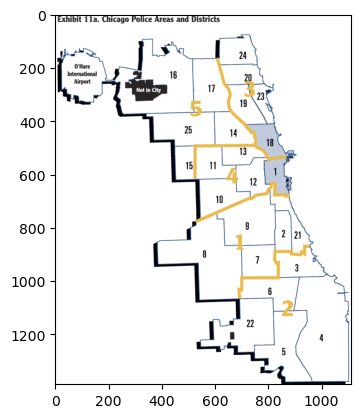

In [159]:
#an example of a district map

#https://www.geeksforgeeks.org/reading-images-in-python/

# Python program to read 
# image using matplotlib
 
# importing matplotlib modules
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
 
# Read Images
img = mpimg.imread('data/ChicagoPolice_2002-Anual-Report_2023-11-29.png')
 
# Output Images
plt.imshow(img)

In [160]:
#keeps index numbers for the data with district number 21 for the check after it's changed
list_21 = df[df['District'] == 21].index
list_21

Int64Index([2288341, 2526528, 2721146, 2752737], dtype='int64')

In [161]:
#change values 21 for the district to 2

#!!!!!  NOT FINISHED YET !!!!!!!!!!!
#b/c 21 is used at the bottom of this notebook. delete it after that part is done. the code order will be changed


#### insert district numbers into the rows that are null values

In [162]:
#shows 3 cols: 'Block', 'Beat', and 'Location' for the data that are NA in the col., 'District'
df[df['District'].isna()].loc[:, ['Block', 'Beat', 'Location']]

,Block,Beat,Location
732460,100XX W BRYN MAWR AVE,1654,"(41.978203083, -87.877418076)"
2798584,007XX E GRAND AVE,1834,"(41.892164276, -87.607702294)"
2813405,002XX N BREAKWATER ACCESS,124,"(41.886322717, -87.610023281)"
3326788,010XX E GRAND AVE,1834,"(41.892239847, -87.6031729)"
3577303,006XX E RANDOLPH ST,124,"(41.884107246, -87.610757027)"
4460040,001XX E 107TH ST,513,"(41.699909081, -87.620563915)"
4460403,030XX S ASHLAND AVE,922,"(41.838967983, -87.665778978)"
4479566,034XX N RACINE AVE,1924,"(41.944631611, -87.659105355)"
4484762,025XX N BOSWORTH AVE,1931,"(41.927232776, -87.667013003)"
4486777,061XX S MICHIGAN AVE,311,"(41.783365222, -87.622173961)"


In [163]:
#imports the exported file that district numbers serched on the Chicago portal are filled
na_dist = pd.read_csv('data/district_for_na.csv', index_col=0)
na_dist.head()

#during searching, different Beat No. (first 1 or 2 digits) and District No. were found

,Beat,dis_manual
732460,1654,16
2798584,1834,18
2813405,124,1
3326788,1834,18
3577303,124,1


In [164]:
#concatenates 2 dataframes: <df> and <na_dist>
df = pd.concat([df, na_dist], axis=1)
df.head(2)

,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,...,Y Coordinate,Year,Latitude,Longitude,Location,date,time,am_pm,Beat,dis_manual
0,043XX S WOOD ST,0486,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,0,1,924,9.0,12.0,...,1875917.0,2015,41.815117,-87.6700,"(41.815117282, -87.669999562)",2015-09-05,01:30:00,PM,NaN,NaN
1,008XX N CENTRAL AVE,0870,THEFT,POCKET-PICKING,CTA BUS,0,0,1511,15.0,29.0,...,1904869.0,2015,41.895080,-87.7654,"(41.895080471, -87.765400451)",2015-09-04,11:30:00,AM,NaN,NaN


In [165]:
#double check if successfully concatenated for rows with NA
df[df['District'].isna()]

,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,...,Y Coordinate,Year,Latitude,Longitude,Location,date,time,am_pm,Beat,dis_manual
732460,100XX W BRYN MAWR AVE,0460,BATTERY,SIMPLE,PARKING LOT/GARAGE(NON.RESID.),0,0,1654,NaN,41.0,...,1934977.0,2017,41.978203,-87.877418,"(41.978203083, -87.877418076)",2017-12-14,08:10:00,PM,1654.0,16.0
2798584,007XX E GRAND AVE,1150,DECEPTIVE PRACTICE,CREDIT CARD FRAUD,RESTAURANT,0,0,1834,NaN,42.0,...,1904130.0,2004,41.892164,-87.607702,"(41.892164276, -87.607702294)",2004-06-26,10:00:00,AM,1834.0,18.0
2813405,002XX N BREAKWATER ACCESS,0610,BURGLARY,FORCIBLE ENTRY,CONSTRUCTION SITE,0,0,124,NaN,42.0,...,1901996.0,2004,41.886323,-87.610023,"(41.886322717, -87.610023281)",2004-10-14,03:41:00,PM,124.0,1.0
3326788,010XX E GRAND AVE,2825,OTHER OFFENSE,HARASSMENT BY TELEPHONE,GOVERNMENT BUILDING/PROPERTY,0,1,1834,NaN,42.0,...,1904168.0,2005,41.892240,-87.603173,"(41.892239847, -87.6031729)",2005-11-10,10:10:00,AM,1834.0,18.0
3577303,006XX E RANDOLPH ST,0460,BATTERY,SIMPLE,OTHER,0,0,124,NaN,42.0,...,1901187.0,2006,41.884107,-87.610757,"(41.884107246, -87.610757027)",2006-05-10,07:40:00,PM,124.0,1.0
4460040,001XX E 107TH ST,1811,NARCOTICS,POSS: CANNABIS 30GMS OR LESS,ALLEY,1,0,513,NaN,9.0,...,1834044.0,2008,41.699909,-87.620564,"(41.699909081, -87.620563915)",2008-07-13,06:08:55,PM,513.0,5.0
4460403,030XX S ASHLAND AVE,1140,DECEPTIVE PRACTICE,EMBEZZLEMENT,OTHER,0,0,922,NaN,11.0,...,1884617.0,2007,41.838968,-87.665779,"(41.838967983, -87.665778978)",2007-01-07,05:00:00,AM,922.0,9.0
4479566,034XX N RACINE AVE,1563,SEX OFFENSE,CRIMINAL SEXUAL ABUSE,SIDEWALK,0,0,1924,NaN,44.0,...,1923135.0,2008,41.944632,-87.659105,"(41.944631611, -87.659105355)",2008-08-23,09:23:00,PM,1924.0,19.0
4484762,025XX N BOSWORTH AVE,0320,ROBBERY,STRONGARM - NO WEAPON,STREET,0,0,1931,NaN,32.0,...,1916778.0,2008,41.927233,-87.667013,"(41.927232776, -87.667013003)",2008-08-26,11:40:00,PM,1931.0,19.0
4486777,061XX S MICHIGAN AVE,1122,DECEPTIVE PRACTICE,COUNTERFEIT CHECK,CHURCH/SYNAGOGUE/PLACE OF WORSHIP,0,0,311,NaN,20.0,...,1864451.0,2008,41.783365,-87.622174,"(41.783365222, -87.622173961)",2008-08-23,12:00:00,PM,311.0,3.0


In [166]:
#insert values from the 'dis_manual' col. to the 'District' col. 
df['District'].fillna(df['dis_manual'], inplace=True)

In [167]:
#checks if NA for 'District' is none
df[df['District'].isna()]

,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,...,Y Coordinate,Year,Latitude,Longitude,Location,date,time,am_pm,Beat,dis_manual


In [168]:
#double check for the other way
#results should be the data that was missing value
df[df['dis_manual'].notna()]

,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,...,Y Coordinate,Year,Latitude,Longitude,Location,date,time,am_pm,Beat,dis_manual
732460,100XX W BRYN MAWR AVE,0460,BATTERY,SIMPLE,PARKING LOT/GARAGE(NON.RESID.),0,0,1654,16.0,41.0,...,1934977.0,2017,41.978203,-87.877418,"(41.978203083, -87.877418076)",2017-12-14,08:10:00,PM,1654.0,16.0
2798584,007XX E GRAND AVE,1150,DECEPTIVE PRACTICE,CREDIT CARD FRAUD,RESTAURANT,0,0,1834,18.0,42.0,...,1904130.0,2004,41.892164,-87.607702,"(41.892164276, -87.607702294)",2004-06-26,10:00:00,AM,1834.0,18.0
2813405,002XX N BREAKWATER ACCESS,0610,BURGLARY,FORCIBLE ENTRY,CONSTRUCTION SITE,0,0,124,1.0,42.0,...,1901996.0,2004,41.886323,-87.610023,"(41.886322717, -87.610023281)",2004-10-14,03:41:00,PM,124.0,1.0
3326788,010XX E GRAND AVE,2825,OTHER OFFENSE,HARASSMENT BY TELEPHONE,GOVERNMENT BUILDING/PROPERTY,0,1,1834,18.0,42.0,...,1904168.0,2005,41.892240,-87.603173,"(41.892239847, -87.6031729)",2005-11-10,10:10:00,AM,1834.0,18.0
3577303,006XX E RANDOLPH ST,0460,BATTERY,SIMPLE,OTHER,0,0,124,1.0,42.0,...,1901187.0,2006,41.884107,-87.610757,"(41.884107246, -87.610757027)",2006-05-10,07:40:00,PM,124.0,1.0
4460040,001XX E 107TH ST,1811,NARCOTICS,POSS: CANNABIS 30GMS OR LESS,ALLEY,1,0,513,5.0,9.0,...,1834044.0,2008,41.699909,-87.620564,"(41.699909081, -87.620563915)",2008-07-13,06:08:55,PM,513.0,5.0
4460403,030XX S ASHLAND AVE,1140,DECEPTIVE PRACTICE,EMBEZZLEMENT,OTHER,0,0,922,9.0,11.0,...,1884617.0,2007,41.838968,-87.665779,"(41.838967983, -87.665778978)",2007-01-07,05:00:00,AM,922.0,9.0
4479566,034XX N RACINE AVE,1563,SEX OFFENSE,CRIMINAL SEXUAL ABUSE,SIDEWALK,0,0,1924,19.0,44.0,...,1923135.0,2008,41.944632,-87.659105,"(41.944631611, -87.659105355)",2008-08-23,09:23:00,PM,1924.0,19.0
4484762,025XX N BOSWORTH AVE,0320,ROBBERY,STRONGARM - NO WEAPON,STREET,0,0,1931,19.0,32.0,...,1916778.0,2008,41.927233,-87.667013,"(41.927232776, -87.667013003)",2008-08-26,11:40:00,PM,1931.0,19.0
4486777,061XX S MICHIGAN AVE,1122,DECEPTIVE PRACTICE,COUNTERFEIT CHECK,CHURCH/SYNAGOGUE/PLACE OF WORSHIP,0,0,311,3.0,20.0,...,1864451.0,2008,41.783365,-87.622174,"(41.783365222, -87.622173961)",2008-08-23,12:00:00,PM,311.0,3.0


In [169]:
#deletes the last 2 cols. (concatenated columns earlier)
df.drop(columns=df.columns[-2:], inplace=True)
df.head(2)

,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,District,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Latitude,Longitude,Location,date,time,am_pm
0,043XX S WOOD ST,0486,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,0,1,9.0,12.0,61.0,08B,1165074.0,1875917.0,2015,41.815117,-87.6700,"(41.815117282, -87.669999562)",2015-09-05,01:30:00,PM
1,008XX N CENTRAL AVE,0870,THEFT,POCKET-PICKING,CTA BUS,0,0,15.0,29.0,25.0,06,1138875.0,1904869.0,2015,41.895080,-87.7654,"(41.895080471, -87.765400451)",2015-09-04,11:30:00,AM


In [170]:
df.isna().sum()

Block                        0
IUCR                         0
Primary Type                 0
Description                  0
Location Description     10603
Arrest                       0
Domestic                     0
District                     0
Ward                    613248
Community Area          611899
FBI Code                     0
X Coordinate             87354
Y Coordinate             87354
Year                         0
Latitude                 87354
Longitude                87354
Location                 87354
date                         0
time                         0
am_pm                        0
dtype: int64

###
<p>-------------------------------------------------------------</p>

1. Delete rows
3. Delete columns - changed my mind about `Latitude` and `Longitude`, which is to delete them and leave `Location` since the exact info. is useful

In [171]:
#delete rows with NA in 'Location Description'
df.dropna(subset=['Location Description'], inplace=True)

#delete cols: 'X Coordinate', 'Y Coordinate', and 'Location'
df.drop(columns=['X Coordinate', 'Y Coordinate', 'Latitude', 'Longitude'], inplace=True)

#checks the destribution % again
df.isna().mean()*100 #same as df.isna().sum()/df.shape[0]*100

Block                   0.000000
IUCR                    0.000000
Primary Type            0.000000
Description             0.000000
Location Description    0.000000
Arrest                  0.000000
Domestic                0.000000
District                0.000000
Ward                    7.870214
Community Area          7.852914
FBI Code                0.000000
Year                    0.000000
Location                1.071566
date                    0.000000
time                    0.000000
am_pm                   0.000000
dtype: float64

###
TILL HERE

---

THE BELOW HASN'T DONE PROPERLY YET

In [172]:
#see how numbers are changed if null values in 'Ward' is deleted
w_del = df.copy()
w_del.dropna(subset='Ward', inplace=True)
w_del.head(2)

,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,District,Ward,Community Area,FBI Code,Year,Location,date,time,am_pm
0,043XX S WOOD ST,0486,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,0,1,9.0,12.0,61.0,08B,2015,"(41.815117282, -87.669999562)",2015-09-05,01:30:00,PM
1,008XX N CENTRAL AVE,0870,THEFT,POCKET-PICKING,CTA BUS,0,0,15.0,29.0,25.0,06,2015,"(41.895080471, -87.765400451)",2015-09-04,11:30:00,AM


In [173]:
w_del.isna().sum()

Block                       0
IUCR                        0
Primary Type                0
Description                 0
Location Description        0
Arrest                      0
Domestic                    0
District                    0
Ward                        0
Community Area           1233
FBI Code                    0
Year                        0
Location                74256
date                        0
time                        0
am_pm                       0
dtype: int64

In [175]:
df[df['Location'].isna()]['Block'].value_counts()

033XX W FILLMORE ST      1164
100XX W OHARE ST          344
006XX W OHARE ST          284
015XX W 13TH ST           198
0000X W TERMINAL ST       143
                         ... 
072XX S SOUTH CHICAGO       1
012XX W SUPERIOR ST         1
082XX S HOMAN AVE           1
004XX N LOCKWOOD AV         1
087XX S PARNELL AVE         1
Name: Block, Length: 24922, dtype: int64

In [25]:
df[(df['Block']=='033XX W FILLMORE ST') & (df['Location'].notna())]

,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Latitude,Longitude,Location
29254,10/05/2015 06:00:00 AM,033XX W FILLMORE ST,1811,NARCOTICS,POSS: CANNABIS 30GMS OR LESS,POLICE FACILITY/VEH PARKING LOT,True,False,1134,11.0,24.0,29.0,18,1154228.0,1895173.0,2015,41.868181,-87.709271,"(41.868180939, -87.709271389)"
41222,10/29/2015 12:00:00 PM,033XX W FILLMORE ST,2024,NARCOTICS,POSS: HEROIN(WHITE),POLICE FACILITY/VEH PARKING LOT,True,False,1134,11.0,24.0,29.0,18,1154228.0,1895173.0,2015,41.868181,-87.709271,"(41.868180939, -87.709271389)"
44405,11/02/2015 07:00:00 PM,033XX W FILLMORE ST,2093,NARCOTICS,FOUND SUSPECT NARCOTICS,PARKING LOT/GARAGE(NON.RESID.),True,False,1134,11.0,24.0,29.0,18,1154195.0,1895173.0,2015,41.868182,-87.709393,"(41.868181597, -87.709392539)"
45853,11/04/2015 02:03:00 PM,033XX W FILLMORE ST,2091,NARCOTICS,FORFEIT PROPERTY,POLICE FACILITY/VEH PARKING LOT,True,False,1134,11.0,24.0,29.0,18,1154228.0,1895173.0,2015,41.868181,-87.709271,"(41.868180939, -87.709271389)"
56523,10/04/2015 09:00:00 AM,033XX W FILLMORE ST,2050,NARCOTICS,CRIMINAL DRUG CONSPIRACY,OTHER,True,False,1134,11.0,24.0,29.0,18,1154228.0,1895173.0,2015,41.868181,-87.709271,"(41.868180939, -87.709271389)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7784075,02/16/2023 09:17:00 AM,033XX W FILLMORE ST,142B,WEAPONS VIOLATION,UNLAWFUL SALE - OTHER FIREARM,POLICE FACILITY / VEHICLE PARKING LOT,False,False,1134,11.0,24.0,29.0,15,1154228.0,1895173.0,2023,41.868181,-87.709271,"(41.868180939, -87.709271389)"
7791567,02/27/2023 08:28:00 PM,033XX W FILLMORE ST,5000,OTHER OFFENSE,OTHER CRIME AGAINST PERSON,POLICE FACILITY / VEHICLE PARKING LOT,False,False,1134,11.0,24.0,29.0,26,1154228.0,1895173.0,2023,41.868181,-87.709271,"(41.868180939, -87.709271389)"
7798431,04/09/2022 07:00:00 PM,033XX W FILLMORE ST,5000,OTHER OFFENSE,OTHER CRIME AGAINST PERSON,POLICE FACILITY / VEHICLE PARKING LOT,False,False,1134,11.0,24.0,29.0,26,1154228.0,1895173.0,2022,41.868181,-87.709271,"(41.868180939, -87.709271389)"
7800951,04/09/2022 07:40:00 PM,033XX W FILLMORE ST,5000,OTHER OFFENSE,OTHER CRIME AGAINST PERSON,POLICE FACILITY / VEHICLE PARKING LOT,False,False,1134,11.0,24.0,29.0,26,1154228.0,1895173.0,2022,41.868181,-87.709271,"(41.868180939, -87.709271389)"


In [9]:
#creates a new text file with the columns with 0% above results and the column 'District'
#b/c 'District' can be taken by the values in 'Beat'
col=[]
for i in df.columns:
    if i == 'District' or df[i].isna().mean() == 0:
        col.append(i)
df2 = df[col]
df2.head(1)

,Date,Block,IUCR,Primary Type,Description,Arrest,Domestic,Beat,District,FBI Code,Year
0,09/05/2015 01:30:00 PM,043XX S WOOD ST,0486,BATTERY,DOMESTIC BATTERY SIMPLE,False,True,924,9.0,08B,2015


#
---
Realised all incidents happened at the same spot duing years: the below code. Are there more places that happened many insidence, and if they are, what part of areas they are?

In [176]:
#checks years for the district 21
df[df['District'] == 21]

,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,District,Ward,Community Area,FBI Code,Year,Location,date,time,am_pm
2288341,031XX S INDIANA AVE,0890,THEFT,FROM BUILDING,OTHER,0,0,21.0,3.0,35.0,06,2003,"(41.837900603, -87.62191544)",2003-07-20,12:05:00,AM
2526528,031XX S INDIANA AVE,0420,BATTERY,AGGRAVATED:KNIFE/CUTTING INSTR,SIDEWALK,0,0,21.0,3.0,35.0,04B,2004,"(41.837900603, -87.62191544)",2004-02-18,06:15:00,PM
2721146,031XX S INDIANA AVE,2024,NARCOTICS,POSS: HEROIN(WHITE),STREET,1,0,21.0,3.0,35.0,18,2004,"(41.837900603, -87.62191544)",2004-07-04,03:45:48,PM
2752737,031XX S INDIANA AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,VEHICLE NON-COMMERCIAL,1,1,21.0,3.0,35.0,08B,2004,"(41.837900603, -87.62191544)",2004-08-01,08:05:00,PM


In [177]:
df['Location'].value_counts()

(41.976290414, -87.905227221)    14180
(41.754592961, -87.741528537)    10286
(41.883500187, -87.627876698)     8401
(41.897895128, -87.624096605)     4855
(41.909664252, -87.742728815)     3475
                                 ...  
(41.792209603, -87.606318829)        1
(41.792072486, -87.630588963)        1
(41.801141866, -87.62248356)         1
(41.810276122, -87.695638181)        1
(41.889651663, -87.657348025)        1
Name: Location, Length: 891687, dtype: int64

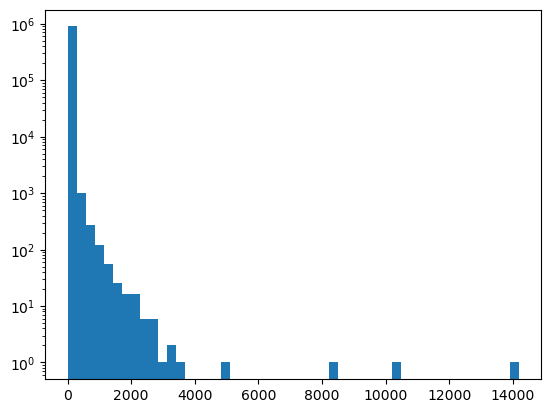

In [178]:
import matplotlib.pyplot as plt
plt.figure()
plt.hist(df['Location'].value_counts(), bins=50)
plt.yscale('log')
plt.show()

In [179]:
(df['Location'].value_counts()>2000).sum()

36

In [126]:
df['Location'].value_counts().head(36)

(41.976290414, -87.905227221)    14180
(41.754592961, -87.741528537)    10290
(41.883500187, -87.627876698)     8405
(41.897895128, -87.624096605)     4863
(41.909664252, -87.742728815)     3477
(41.896888586, -87.628203192)     3364
(41.788987036, -87.74147999)      3196
(41.885487535, -87.726422045)     2853
(41.88233367, -87.627841791)      2713
(41.979006297, -87.906463155)     2689
(41.736259984, -87.628068782)     2682
(41.721627204, -87.624485177)     2636
(41.868180939, -87.709271389)     2609
(41.868541914, -87.639235361)     2559
(41.904192368, -87.647000785)     2524
(42.019399237, -87.675049485)     2483
(41.737094305, -87.572998178)     2454
(41.891990384, -87.611461502)     2444
(41.68995741, -87.637460623)      2300
(41.736148121, -87.629070243)     2275
(41.899410159, -87.624131266)     2264
(41.882394062, -87.627844798)     2224
(41.750940757, -87.625185222)     2210
(41.739265865, -87.604893749)     2204
(41.891694878, -87.626155832)     2185
(41.929743818, -87.684273

---

In [17]:
df2.drop(columns='District').to_csv('data/timeSer.csv', index=False)